# The Battle of Neighborhoods 
### <img title="wiki" alt="wiki" src="https://www.charlottestories.com/wp-content/uploads/2016/02/fourth-ward-charlotte-neighborhood.jpg" width="160" lenght="300" align=right > Finding an ideal neighborhood for an Expat to live in :)

Using the data from the dataset available in Kaggle for 'Recorded Crime in Ireland from 2003 to 2019 Garda-wise Quarterly' , datasets from cso.ie, data.gov.ie & a list of areas in DublinCity dataset from the wiki pages.

##### To carry out the analysis using Python the fiest step is to import the required libraries.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 13.7 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1d4fbdc6162cb1e8a7107a6c449798e10d934deee76dd23193816183e50d4e0d
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


### Data Requirements
An Expat planning to move to a new country, would ideally have to explore many areas in the city & then decide on a place to live in. For this exercise we need the following data or data required is:
* Population in the area.
* Crime rate in the area.
* Average Rental Index in the area.
* Popular venues in the area (Parks, Restaurants, Educational Institutions, transport options etc).


In [2]:

import os, types
#import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_9ee4692382c8426589627df3b7d0ead6 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_9ee4692382c8426589627df3b7d0ead6 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_9ee4692382c8426589627df3b7d0ead6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cLY2r7ngBZYcFwxP6RJQqRRKBcfncj5q-VrueqRF1J8I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_9ee4692382c8426589627df3b7d0ead6)

body = client_9ee4692382c8426589627df3b7d0ead6.get_object(Bucket='appliedcapstoneproject-donotdelete-pr-kn0yrti8lkehz4',Key='Dublin_Areas.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



### Data Collection
**Dublin areas with estimated population:** list of areas in Dublin City by postal code and Garda divisions data from the wiki pages & the Census 2016 estimate by townlands available in the cso.ie website.<br>
**Crime data of Dublin:** This is a kaggle dataset available with the name 'Recorded Crime in Ireland from 2003 to 2019 Garda-wise Quarterly'.<br>
**Average Rental Index data:** This dataset is from cso.ie website that gives the RTB – average rental index in various locations in Ireland.


In [3]:
# Above cell is removed when the file is uploaded to github as it contains the credential information.
dublin_areas = pd.read_csv(body)
dublin_areas.head()


,Area Name,Postal District,Grada Division,PopulationCensus2016,2021PopulationEstimate
0,Abbey St,Dublin 1,D.M.R. North Central Division,8014,8441
1,Amiens St,Dublin 1,D.M.R. North Central Division,6776,7137
2,Capel St,Dublin 1,D.M.R. North Central Division,1052,1108
3,Dorset St,Dublin 1,D.M.R. North Central Division,1703,1794
4,Henry St,Dublin 1,D.M.R. North Central Division,6300,6636


In [4]:

body = client_9ee4692382c8426589627df3b7d0ead6.get_object(Bucket='appliedcapstoneproject-donotdelete-pr-kn0yrti8lkehz4',Key='IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_data = pd.read_csv(body)
crime_data.head()


,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


In [5]:

body = client_9ee4692382c8426589627df3b7d0ead6.get_object(Bucket='appliedcapstoneproject-donotdelete-pr-kn0yrti8lkehz4',Key='RIA02.20210312T120350.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rental_index_data = pd.read_csv(body)
rental_index_data.head()


,STATISTIC,Statistic,TLIST(A1),Year,C02970V03592,Number of Bedrooms,C02969V03591,Property Type,C03004V03625,Location,UNIT,VALUE
0,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110000,Carlow,Euro,752.82
1,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110200,Carlow Town,Euro,796.03
2,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110300,"Graiguecullen, Carlow",Euro,754.20
3,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110500,"Tullow, Carlow",Euro,717.01
4,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110550,Cavan,Euro,571.57


### Data Preparation for Modeling

**Crime Data**
* From the above data sets we can see that that data in crime data is from 2003 and in quaterly wise; 
* Lets just get the data from 2016 to 2019 as we need latest information & only for Dublin City.
* Also lets get the total for a year instead for a quarter.
* We will then assign each Grada district to a risk zone based on the no.of incidents in total.

**Rental Data**
* From the above data sets we can see that that data in rental data is from 2008 and from various locations; 
* Lets just get the data from 2016 to 2019 as we need latest information.
* The location is a concatenated field for area, city. So we will split the cell and get 2 new columns area and city.
* Select only the information where city is Dublin.

**Combine all datasets to one single dataframe for us to work with the model & apply the machine learning technique to solve the problem**
* Combine the data at Grada district level for crime information with risk zone category as per the latest.
* Combine the data at area level for average rental index and fill with mean value for rent if any areas are missing with Value. Here select only the 2019 rents as we can get an insight of latest rent trends in the loacation.

##### working on crime dataset first.

In [6]:
crime_data['REGION'].unique()

array(['NORTHERN REGION', 'WESTERN REGION', 'SOUTHERN REGION',
       'EASTERN REGION', 'SOUTH EASTERN REGION',
       'DUBLIN METROPOLITAN REGION'], dtype=object)

In [8]:
crime_data =crime_data[crime_data["REGION"] == "DUBLIN METROPOLITAN REGION"].reset_index()

crime_data.head()

,level_0,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,0,1276,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,1,1,1,...,0,0,0,1,0,0,0,0,1,0
1,1,1277,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1278,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1279,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,4,1280,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,13,13,11,...,34,24,28,34,37,30,34,41,37,43


In [9]:
crime_data_2016 = crime_data[['REGION','GARDA DIVISION','OFFENCE CODE','OFFENCE','TYPE OF OFFENCE','2016Q1','2016Q2','2016Q3','2016Q4']].reset_index()
crime_data_2016['2016']=crime_data_2016['2016Q1']+crime_data_2016['2016Q2']+crime_data_2016['2016Q3']+crime_data_2016['2016Q4']
crime_data_2016.head()

,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2016Q1,2016Q2,2016Q3,2016Q4,2016
0,0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,0,0,1,2,3
1,1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0
2,2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0
3,3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,0,0,0,0
4,4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,25,31,28,30,114


In [10]:
crime_data_2017 = crime_data[['REGION','GARDA DIVISION','OFFENCE CODE','OFFENCE','TYPE OF OFFENCE','2017Q1','2017Q2','2017Q3','2017Q4']].reset_index()
crime_data_2017['2017']=crime_data_2017['2017Q1']+crime_data_2017['2017Q2']+crime_data_2017['2017Q3']+crime_data_2017['2017Q4']
crime_data_2017.head()


,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2017Q1,2017Q2,2017Q3,2017Q4,2017
0,0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0
1,1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0
2,2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0
3,3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,0,1,0,1
4,4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,44,34,24,28,130


In [11]:
crime_data_2018 = crime_data[['REGION','GARDA DIVISION','OFFENCE CODE','OFFENCE','TYPE OF OFFENCE','2018Q1','2018Q2','2018Q3','2018Q4']].reset_index()
crime_data_2018['2018']=crime_data_2018['2018Q1']+crime_data_2018['2018Q2']+crime_data_2018['2018Q3']+crime_data_2018['2018Q4']
crime_data_2018.head()

,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2018Q1,2018Q2,2018Q3,2018Q4,2018
0,0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,1,0,0,0,1
1,1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0
2,2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0
3,3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,1,0,0,1
4,4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,34,37,30,34,135


In [12]:
crime_data_2019 = crime_data[['REGION','GARDA DIVISION','OFFENCE CODE','OFFENCE','TYPE OF OFFENCE','2019Q1','2019Q2','2019Q3']].reset_index()
crime_data_2019['2019Q4'] = crime_data_2019[['2019Q1','2019Q2', '2019Q3']].mean(axis=1)
crime_data_2019['2019']=crime_data_2019['2019Q1']+crime_data_2019['2019Q2']+crime_data_2019['2019Q3']+crime_data_2019['2019Q4']
crime_data_2019.head()


,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2019Q1,2019Q2,2019Q3,2019Q4,2019
0,0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,0,1,0,0.333333,1.333333
1,1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0.000000,0.000000
2,2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0.000000,0.000000
3,3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,0,0,0.000000,0.000000
4,4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,41,37,43,40.333333,161.333333


In [13]:
crime_data_full=pd.concat([crime_data_2016, crime_data_2017[['2017']], crime_data_2018[['2018']],crime_data_2019[['2019']]], axis=1)
crime_data_full.head()

,index,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2016Q1,2016Q2,2016Q3,2016Q4,2016,2017,2018,2019
0,0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,0,0,1,2,3,0,1,1.333333
1,1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,0,0,0.000000
2,2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,0,0,0.000000
3,3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,0,0,0,0,1,1,0.000000
4,4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,25,31,28,30,114,130,135,161.333333


In [14]:
# drop unncessary coloumns
crime_data_full.drop(columns=['2016Q1','2016Q2','2016Q4','2016Q3','index'], inplace=True)
crime_data_full.reset_index()
crime_data_full.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2016,2017,2018,2019
0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,3,0,1,1.333333
1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0.000000
2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0.000000
3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,1,1,0.000000
4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,114,130,135,161.333333


In [15]:
crime_data_full = crime_data_full.fillna(0)
crime_data_full['2019'].round(0)
crime_data_full['Total']=crime_data_full['2016']+crime_data_full['2017']+crime_data_full['2018']+crime_data_full['2019']

crime_data_full['OFFENCE CODE'] = crime_data_full['OFFENCE CODE'].astype(int)
crime_data_full['Total'] = crime_data_full['Total'].astype(int)
crime_data_full['2016'] = crime_data_full['2016'].astype(int)
crime_data_full['2017'] = crime_data_full['2017'].astype(int)
crime_data_full['2018'] = crime_data_full['2018'].astype(int)
crime_data_full['2019'] = crime_data_full['2019'].astype(int)
crime_data_full.info()
crime_data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REGION           348 non-null    object
 1   GARDA DIVISION   348 non-null    object
 2   OFFENCE CODE     348 non-null    int64 
 3   OFFENCE          348 non-null    object
 4   TYPE OF OFFENCE  348 non-null    object
 5   2016             348 non-null    int64 
 6   2017             348 non-null    int64 
 7   2018             348 non-null    int64 
 8   2019             348 non-null    int64 
 9   Total            348 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 27.3+ KB


,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2016,2017,2018,2019,Total
0,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,111,Murder,HOMICIDE OFFENCES,3,0,1,1,5
1,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0
2,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0
3,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,12,Dangerous driving leading to death,HOMICIDE OFFENCES,0,1,1,0,2
4,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,21,Rape and sexual assault,SEXUAL OFFENCES,114,130,135,161,540


In [30]:
crime_data_risk = crime_data_full.groupby('GARDA DIVISION', axis=0).sum()
crime_data_risk.head(10)

,OFFENCE CODE,2016,2017,2018,2019,Total
GARDA DIVISION,,,,,,
D.M.R. EASTERN,24852,8237,8629,7805,7976,32647
D.M.R. NORTH CENTRAL,24852,19884,20770,21486,21634,83774
D.M.R. NORTHERN,24852,13474,14932,16169,17239,61814
D.M.R. SOUTH CENTRAL,24852,16541,19135,18310,18961,72947
D.M.R. SOUTHERN,24852,12148,11515,12072,13071,48806
D.M.R. WESTERN,24852,15883,16851,17153,19376,69263


In [31]:
crime_data_risk.reset_index(level =['GARDA DIVISION'], inplace = True)
crime_data_risk.column=['GARDA DIVISION','Offense','2016','2017','2018','2019','Total']

crime_data_risk.head(20)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


,GARDA DIVISION,OFFENCE CODE,2016,2017,2018,2019,Total
0,D.M.R. EASTERN,24852,8237,8629,7805,7976,32647
1,D.M.R. NORTH CENTRAL,24852,19884,20770,21486,21634,83774
2,D.M.R. NORTHERN,24852,13474,14932,16169,17239,61814
3,D.M.R. SOUTH CENTRAL,24852,16541,19135,18310,18961,72947
4,D.M.R. SOUTHERN,24852,12148,11515,12072,13071,48806
5,D.M.R. WESTERN,24852,15883,16851,17153,19376,69263


In [32]:
crime_data_risk=crime_data_risk[crime_data_risk['GARDA DIVISION']!=0].reset_index()
crime_data_risk.head(6)

,index,GARDA DIVISION,OFFENCE CODE,2016,2017,2018,2019,Total
0,0,D.M.R. EASTERN,24852,8237,8629,7805,7976,32647
1,1,D.M.R. NORTH CENTRAL,24852,19884,20770,21486,21634,83774
2,2,D.M.R. NORTHERN,24852,13474,14932,16169,17239,61814
3,3,D.M.R. SOUTH CENTRAL,24852,16541,19135,18310,18961,72947
4,4,D.M.R. SOUTHERN,24852,12148,11515,12072,13071,48806
5,5,D.M.R. WESTERN,24852,15883,16851,17153,19376,69263


In [27]:
total = crime_data_risk['Total'].sum()
total2016 = crime_data_risk['2016'].sum()
total2017 = crime_data_risk['2017'].sum()
total2018 = crime_data_risk['2018'].sum()
total2019 = crime_data_risk['2019'].sum()

In [33]:
crime_data_risk['TotalRisk'] = (crime_data_risk['Total'] / total) * 100
crime_data_risk['Risk2016'] = (crime_data_risk['2016'] / total2016) * 100
crime_data_risk['Risk2017'] = (crime_data_risk['2017'] / total2017) * 100
crime_data_risk['Risk2018'] = (crime_data_risk['2018'] / total2018) * 100
crime_data_risk['Risk2019'] = (crime_data_risk['2019'] / total2019) * 100

crime_data_risk.reset_index()
crime_data_risk.head(10)

,index,GARDA DIVISION,OFFENCE CODE,2016,2017,2018,2019,Total,TotalRisk,Risk2016,Risk2017,Risk2018,Risk2019
0,0,D.M.R. EASTERN,24852,8237,8629,7805,7976,32647,8.841411,9.559344,9.396507,8.392924,8.117488
1,1,D.M.R. NORTH CENTRAL,24852,19884,20770,21486,21634,83774,22.687549,23.076120,22.617388,23.104468,22.017770
2,2,D.M.R. NORTHERN,24852,13474,14932,16169,17239,61814,16.740374,15.637077,16.260127,17.386956,17.544806
3,3,D.M.R. SOUTH CENTRAL,24852,16541,19135,18310,18961,72947,19.755397,19.196444,20.836963,19.689231,19.297353
4,4,D.M.R. SOUTHERN,24852,12148,11515,12072,13071,48806,13.217567,14.098205,12.539202,12.981343,13.302869
5,5,D.M.R. WESTERN,24852,15883,16851,17153,19376,69263,18.757701,18.432811,18.349813,18.445078,19.719715


In [34]:

crime_data_risk['RiskZone']=pd.cut(crime_data_risk['TotalRisk'], bins=[0,15, 20, 100], include_lowest=True, labels=['Low', 'Mid', 'High'])
crime_data_risk['RiskZone2016']=pd.cut(crime_data_risk['Risk2016'], bins=[0,15, 20, 100], include_lowest=True, labels=['Low', 'Mid', 'High'])
crime_data_risk['RiskZone2017']=pd.cut(crime_data_risk['Risk2017'], bins=[0,15, 20, 100], include_lowest=True, labels=['Low', 'Mid', 'High'])
crime_data_risk['RiskZone2018']=pd.cut(crime_data_risk['Risk2018'], bins=[0,15, 20, 100], include_lowest=True, labels=['Low', 'Mid', 'High'])
crime_data_risk['RiskZone2019']=pd.cut(crime_data_risk['Risk2019'], bins=[0,15, 20, 100], include_lowest=True, labels=['Low', 'Mid', 'High'])

crime_data_risk.reset_index()
crime_data_risk.head(6)

,index,GARDA DIVISION,OFFENCE CODE,2016,2017,2018,2019,Total,TotalRisk,Risk2016,Risk2017,Risk2018,Risk2019,RiskZone,RiskZone2016,RiskZone2017,RiskZone2018,RiskZone2019
0,0,D.M.R. EASTERN,24852,8237,8629,7805,7976,32647,8.841411,9.559344,9.396507,8.392924,8.117488,Low,Low,Low,Low,Low
1,1,D.M.R. NORTH CENTRAL,24852,19884,20770,21486,21634,83774,22.687549,23.076120,22.617388,23.104468,22.017770,High,High,High,High,High
2,2,D.M.R. NORTHERN,24852,13474,14932,16169,17239,61814,16.740374,15.637077,16.260127,17.386956,17.544806,Mid,Mid,Mid,Mid,Mid
3,3,D.M.R. SOUTH CENTRAL,24852,16541,19135,18310,18961,72947,19.755397,19.196444,20.836963,19.689231,19.297353,Mid,Mid,High,Mid,Mid
4,4,D.M.R. SOUTHERN,24852,12148,11515,12072,13071,48806,13.217567,14.098205,12.539202,12.981343,13.302869,Low,Low,Low,Low,Low
5,5,D.M.R. WESTERN,24852,15883,16851,17153,19376,69263,18.757701,18.432811,18.349813,18.445078,19.719715,Mid,Mid,Mid,Mid,Mid


In [36]:
Crime_data_dublin = crime_data_risk[['GARDA DIVISION','Total','RiskZone']].reset_index()
Crime_data_dublin.head(6)

,index,GARDA DIVISION,Total,RiskZone
0,0,D.M.R. EASTERN,32647,Low
1,1,D.M.R. NORTH CENTRAL,83774,High
2,2,D.M.R. NORTHERN,61814,Mid
3,3,D.M.R. SOUTH CENTRAL,72947,Mid
4,4,D.M.R. SOUTHERN,48806,Low
5,5,D.M.R. WESTERN,69263,Mid


#### Combining the Crime data with the Areas & Postal Districts dataset

In [37]:
dublin_areas['Grada Division']= dublin_areas['Grada Division'].str.upper()
dublin_areas['Grada Division'] = dublin_areas['Grada Division'].str.replace('DIVISION','')
dublin_areas['Grada Division'] = dublin_areas['Grada Division'].str.strip()
dublin_areas.rename(columns = {'Grada Division': 'GARDA DIVISION'}, inplace = True)

dublin_areas.head()

,Area Name,Postal District,GARDA DIVISION,PopulationCensus2016,2021PopulationEstimate
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8014,8441
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,6776,7137
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1052,1108
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1703,1794
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6300,6636


In [38]:
dublin_area_crime =pd.merge(dublin_areas, Crime_data_dublin, on='GARDA DIVISION', how='left')
dublin_area_crime.head()

,Area Name,Postal District,GARDA DIVISION,PopulationCensus2016,2021PopulationEstimate,index,Total,RiskZone
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8014,8441,1,83774,High
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,6776,7137,1,83774,High
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1052,1108,1,83774,High
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1703,1794,1,83774,High
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6300,6636,1,83774,High


In [39]:
rental_index_data =rental_index_data[rental_index_data["Year"] >=2016].reset_index()
rental_index_data.head()

,index,STATISTIC,Statistic,TLIST(A1),Year,C02970V03592,Number of Bedrooms,C02969V03591,Property Type,C03004V03625,Location,UNIT,VALUE
0,149856,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110000,Carlow,Euro,665.02
1,149857,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110200,Carlow Town,Euro,696.12
2,149858,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110300,"Graiguecullen, Carlow",Euro,631.59
3,149859,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110500,"Tullow, Carlow",Euro,616.50
4,149860,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110550,Cavan,Euro,506.82


In [40]:
rental_index_data=pd.concat([rental_index_data, rental_index_data['Location'].str.split(', ', expand=True)], axis=1)
rental_index_data.head()

,index,STATISTIC,Statistic,TLIST(A1),Year,C02970V03592,Number of Bedrooms,C02969V03591,Property Type,C03004V03625,Location,UNIT,VALUE,0,1
0,149856,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110000,Carlow,Euro,665.02,Carlow,None
1,149857,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110200,Carlow Town,Euro,696.12,Carlow Town,None
2,149858,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110300,"Graiguecullen, Carlow",Euro,631.59,Graiguecullen,Carlow
3,149859,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110500,"Tullow, Carlow",Euro,616.50,Tullow,Carlow
4,149860,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,-,All property types,110550,Cavan,Euro,506.82,Cavan,None


In [41]:
rental_index_data.drop(columns=['index','STATISTIC','Statistic','TLIST(A1)','C02970V03592','C02969V03591','C03004V03625'], inplace=True)

rental_index_data.head()

,Year,Number of Bedrooms,Property Type,Location,UNIT,VALUE,0,1
0,2016,All bedrooms,All property types,Carlow,Euro,665.02,Carlow,None
1,2016,All bedrooms,All property types,Carlow Town,Euro,696.12,Carlow Town,None
2,2016,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,631.59,Graiguecullen,Carlow
3,2016,All bedrooms,All property types,"Tullow, Carlow",Euro,616.50,Tullow,Carlow
4,2016,All bedrooms,All property types,Cavan,Euro,506.82,Cavan,None


In [42]:
rental_index_data.columns=['Year','Number of Bedrooms','Property Type','Location','UNIT','VALUE','Area Name','Postal District']
rental_index_data.head()

,Year,Number of Bedrooms,Property Type,Location,UNIT,VALUE,Area Name,Postal District
0,2016,All bedrooms,All property types,Carlow,Euro,665.02,Carlow,None
1,2016,All bedrooms,All property types,Carlow Town,Euro,696.12,Carlow Town,None
2,2016,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,631.59,Graiguecullen,Carlow
3,2016,All bedrooms,All property types,"Tullow, Carlow",Euro,616.50,Tullow,Carlow
4,2016,All bedrooms,All property types,Cavan,Euro,506.82,Cavan,None


In [44]:
rental_latest=rental_index_data[rental_index_data["Year"] == 2019].reset_index()
rental_latest.head()

,index,Year,Number of Bedrooms,Property Type,Location,UNIT,VALUE,Area Name,Postal District
0,56196,2019,All bedrooms,All property types,Carlow,Euro,798.23,Carlow,None
1,56197,2019,All bedrooms,All property types,Carlow Town,Euro,831.92,Carlow Town,None
2,56198,2019,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,814.18,Graiguecullen,Carlow
3,56199,2019,All bedrooms,All property types,"Tullow, Carlow",Euro,738.36,Tullow,Carlow
4,56200,2019,All bedrooms,All property types,Cavan,Euro,610.31,Cavan,None


In [51]:
rental_group = rental_latest.groupby('Postal District', axis=0).mean()
rental_group.head(10)

,index,Year,VALUE
Postal District,,,
Carlow,65341.5,2019.0,753.042174
Cavan,65348.0,2019.0,589.351897
Clare,65355.5,2019.0,674.864030
Cork,65380.5,2019.0,949.623947
Donegal,65406.0,2019.0,534.216812
Dublin,65424.0,2019.0,1685.439149
Dublin 1,65440.5,2019.0,1777.925278
Dublin 10,65514.5,2019.0,1351.007000
Dublin 11,65519.0,2019.0,1430.850000


In [52]:
rental_group.reset_index(level =['Postal District'], inplace = True)
rental_group.columns=['Postal District','index','Year','AverageRentalValue']

rental_group.head(20)

,Postal District,index,Year,AverageRentalValue
0,Carlow,65341.5,2019.0,753.042174
1,Cavan,65348.0,2019.0,589.351897
2,Clare,65355.5,2019.0,674.864030
3,Cork,65380.5,2019.0,949.623947
4,Donegal,65406.0,2019.0,534.216812
5,Dublin,65424.0,2019.0,1685.439149
6,Dublin 1,65440.5,2019.0,1777.925278
7,Dublin 10,65514.5,2019.0,1351.007000
8,Dublin 11,65519.0,2019.0,1430.850000
9,Dublin 12,65524.5,2019.0,1460.492933


In [55]:
dublin_new =pd.merge(dublin_area_crime, rental_group, on='Postal District', how='left')
dublin_new.head()

dublin_new['AverageRentalValue'].fillna(int(dublin_data['AverageRentalValue'].mean()), inplace=True) 
dublin_new.head()

,Area Name,Postal District,GARDA DIVISION,PopulationCensus2016,2021PopulationEstimate,index_x,Total,RiskZone,index_y,Year,AverageRentalValue
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8014,8441,1,83774,High,65440.5,2019.0,1777.925278
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,6776,7137,1,83774,High,65440.5,2019.0,1777.925278
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1052,1108,1,83774,High,65440.5,2019.0,1777.925278
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1703,1794,1,83774,High,65440.5,2019.0,1777.925278
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6300,6636,1,83774,High,65440.5,2019.0,1777.925278


In [181]:
dublin_data=dublin_new[['Area Name','Postal District','GARDA DIVISION','2021PopulationEstimate','Total','RiskZone','AverageRentalValue']]
dublin_data.rename(columns = {'Total': 'Total Incidents','Area Name':'Neighborhood','Postal District':'PostalDistrict'}, inplace = True)
dublin_data['address']=dublin_data['Neighborhood']+','+dublin_data['PostalDistrict']
dublin_data.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Neighborhood,PostalDistrict,GARDA DIVISION,2021PopulationEstimate,Total Incidents,RiskZone,AverageRentalValue,address
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8441,83774,High,1777.925278,"Abbey St,Dublin 1"
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,7137,83774,High,1777.925278,"Amiens St,Dublin 1"
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1108,83774,High,1777.925278,"Capel St,Dublin 1"
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1794,83774,High,1777.925278,"Dorset St,Dublin 1"
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6636,83774,High,1777.925278,"Henry St,Dublin 1"


### Data Understanding
**Dataset is prepared for using in model. Before we train the model, we can visualize the data for different inferences like:**
* Risk Zones - Grada Division wise over the years  
    * Pie chart for total risk zone grada division wise
    * Line graph of total Incidents trends over years
    * Bar garph of Risk Zone over years
* What are the main types of crime incidents that happen in Dublin
    -- word cloud of all the type of incidents
* Trends in Average rents in postal districts over the years
    -- Line graph of rents over years.

In [59]:
Crime_dublin= Crime_data_dublin.groupby('RiskZone', axis=0).count()
Crime_dublin.head(10)

,index,GARDA DIVISION,Total
RiskZone,,,
Low,2,2,2
Mid,3,3,3
High,1,1,1


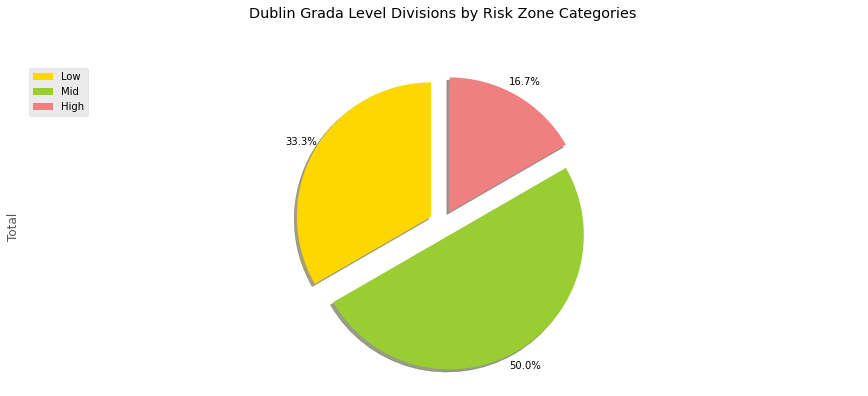

In [60]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

Crime_dublin['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Dublin Grada Level Divisions by Risk Zone Categories', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=Crime_dublin.index, loc='upper left') 

plt.show()

In [63]:
crime_data_risk1=crime_data_risk[['GARDA DIVISION','2016']]
crime_data_risk1.rename(columns = {'2016': 'Total Incidents'}, inplace = True)
crime_data_risk1['Year']=2016
crime_data_risk1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,Total Incidents,Year
0,D.M.R. EASTERN,8237,2016
1,D.M.R. NORTH CENTRAL,19884,2016
2,D.M.R. NORTHERN,13474,2016
3,D.M.R. SOUTH CENTRAL,16541,2016
4,D.M.R. SOUTHERN,12148,2016


In [67]:
crime_data_risk2=crime_data_risk[['GARDA DIVISION','2017']]
crime_data_risk2.rename(columns = {'2017': 'Total Incidents'}, inplace = True)
crime_data_risk2['Year']=2017
crime_data_risk2.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,Total Incidents,Year
0,D.M.R. EASTERN,8629,2017
1,D.M.R. NORTH CENTRAL,20770,2017
2,D.M.R. NORTHERN,14932,2017
3,D.M.R. SOUTH CENTRAL,19135,2017
4,D.M.R. SOUTHERN,11515,2017


In [69]:
crime_data_risk3=crime_data_risk[['GARDA DIVISION','2018']]
crime_data_risk3.rename(columns = {'2018': 'Total Incidents'}, inplace = True)
crime_data_risk3['Year']=2018
crime_data_risk3.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,Total Incidents,Year
0,D.M.R. EASTERN,7805,2018
1,D.M.R. NORTH CENTRAL,21486,2018
2,D.M.R. NORTHERN,16169,2018
3,D.M.R. SOUTH CENTRAL,18310,2018
4,D.M.R. SOUTHERN,12072,2018


In [70]:
crime_data_risk4=crime_data_risk[['GARDA DIVISION','2019']]
crime_data_risk4.rename(columns = {'2019': 'Total Incidents'}, inplace = True)
crime_data_risk4['Year']=2019
crime_data_risk4.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,Total Incidents,Year
0,D.M.R. EASTERN,7976,2019
1,D.M.R. NORTH CENTRAL,21634,2019
2,D.M.R. NORTHERN,17239,2019
3,D.M.R. SOUTH CENTRAL,18961,2019
4,D.M.R. SOUTHERN,13071,2019


In [72]:
Crime_data_vis1 = crime_data_risk1.append(crime_data_risk2, ignore_index=True)
Crime_data_vis2 = Crime_data_vis1.append(crime_data_risk3, ignore_index=True)
Crime_data_vis = Crime_data_vis2.append(crime_data_risk4, ignore_index=True)
Crime_data_vis.head()

,GARDA DIVISION,Total Incidents,Year
0,D.M.R. EASTERN,8237,2016
1,D.M.R. NORTH CENTRAL,19884,2016
2,D.M.R. NORTHERN,13474,2016
3,D.M.R. SOUTH CENTRAL,16541,2016
4,D.M.R. SOUTHERN,12148,2016


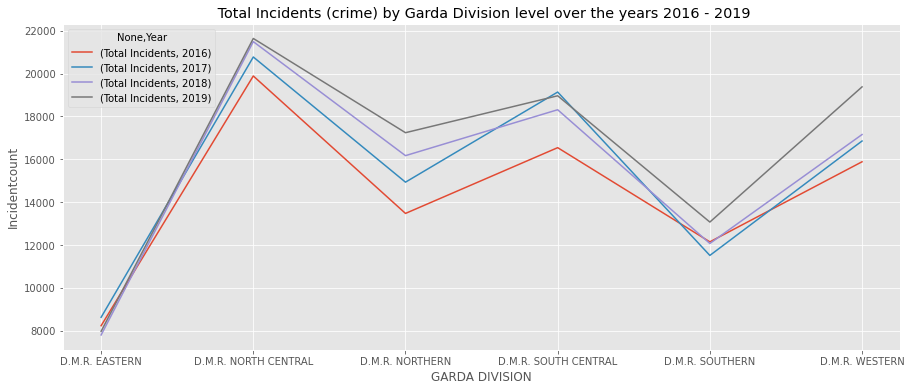

In [134]:
grouped_pivot = Crime_data_vis.pivot(index='GARDA DIVISION',columns='Year').plot(figsize=(15,6))
#grouped_pivot
plt.ylabel('Incidentcount');
plt.title(' Total Incidents (crime) by Garda Division level over the years 2016 - 2019');

In [93]:
rental_vis_data=rental_index_data[['Year','Property Type','VALUE','Postal District']]
#rental_vis_data['Postal District'] = rental_vis_data['Postal District'].astype('|S')
#rental_vis_data=rental_vis_data[rental_vis_data['Postal District'].str.contains('Dublin', na=False)]
rental_vis_data=rental_vis_data[rental_vis_data['Postal District'].str.contains('Dublin', na=False)]
rental_vis_data.head()

,Year,Property Type,VALUE,Postal District
72,2016,All property types,971.77,Dublin
73,2016,All property types,1717.03,Dublin
74,2016,All property types,1751.47,Dublin
75,2016,All property types,NaN,Dublin
76,2016,All property types,NaN,Dublin


In [114]:
rental_vis_data['VALUE'].fillna(int(rental_vis_data['VALUE'].mean()), inplace=True)
rental_vis_data.reset_index()
rental_vis_data.head()

,Year,Property Type,VALUE,Postal District
72,2016,All property types,971.77,Dublin
73,2016,All property types,1717.03,Dublin
74,2016,All property types,1751.47,Dublin
75,2016,All property types,1508.00,Dublin
76,2016,All property types,1508.00,Dublin


In [119]:
rental_vis= rental_vis_data.groupby(['Property Type','Year'], axis=0).mean()
rental_vis.reset_index(level =['Property Type','Year'], inplace = True)
rental_vis.head(10)

,Property Type,Year,VALUE
0,All property types,2016,1413.565734
1,All property types,2017,1487.353163
2,All property types,2018,1562.937892
3,All property types,2019,1623.946433
4,Apartment,2016,1405.584631
5,Apartment,2017,1455.704207
6,Apartment,2018,1510.244020
7,Apartment,2019,1553.374227
8,Detached house,2016,1521.461527
9,Detached house,2017,1526.683015


Text(0, 0.5, 'Rent is Euros')

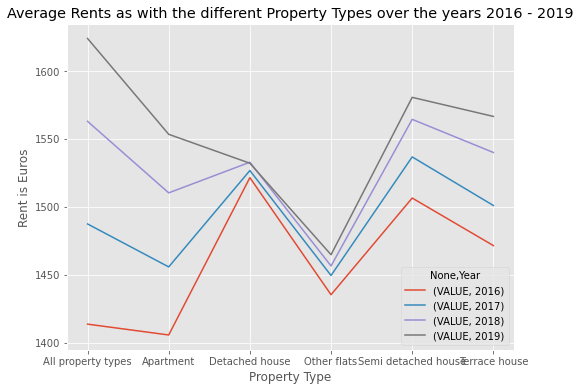

In [133]:
grouped_pivot = rental_vis.pivot(index='Property Type',columns='Year').plot(figsize=(8,6))
#grouped_pivot
plt.title('Average Rents as with the different Property Types over the years 2016 - 2019');
plt.ylabel('Rent is Euros')

In [136]:
crime_vis1=crime_data_risk[['GARDA DIVISION','RiskZone2016']]
crime_vis1.rename(columns = {'RiskZone2016': 'RiskZone'}, inplace = True)
crime_vis1['Year']=2016
crime_vis1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,RiskZone,Year
0,D.M.R. EASTERN,Low,2016
1,D.M.R. NORTH CENTRAL,High,2016
2,D.M.R. NORTHERN,Mid,2016
3,D.M.R. SOUTH CENTRAL,Mid,2016
4,D.M.R. SOUTHERN,Low,2016


In [137]:
crime_vis2=crime_data_risk[['GARDA DIVISION','RiskZone2017']]
crime_vis2.rename(columns = {'RiskZone2017': 'RiskZone'}, inplace = True)
crime_vis2['Year']=2017
crime_vis2.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,RiskZone,Year
0,D.M.R. EASTERN,Low,2017
1,D.M.R. NORTH CENTRAL,High,2017
2,D.M.R. NORTHERN,Mid,2017
3,D.M.R. SOUTH CENTRAL,High,2017
4,D.M.R. SOUTHERN,Low,2017


In [138]:
crime_vis3=crime_data_risk[['GARDA DIVISION','RiskZone2018']]
crime_vis3.rename(columns = {'RiskZone2018': 'RiskZone'}, inplace = True)
crime_vis3['Year']=2018
crime_vis3.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,RiskZone,Year
0,D.M.R. EASTERN,Low,2018
1,D.M.R. NORTH CENTRAL,High,2018
2,D.M.R. NORTHERN,Mid,2018
3,D.M.R. SOUTH CENTRAL,Mid,2018
4,D.M.R. SOUTHERN,Low,2018


In [139]:
crime_vis4=crime_data_risk[['GARDA DIVISION','RiskZone2019']]
crime_vis4.rename(columns = {'RiskZone2019': 'RiskZone'}, inplace = True)
crime_vis4['Year']=2019
crime_vis4.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,GARDA DIVISION,RiskZone,Year
0,D.M.R. EASTERN,Low,2019
1,D.M.R. NORTH CENTRAL,High,2019
2,D.M.R. NORTHERN,Mid,2019
3,D.M.R. SOUTH CENTRAL,Mid,2019
4,D.M.R. SOUTHERN,Low,2019


In [140]:
Crime_vis_bar1 = crime_vis1.append(crime_vis2, ignore_index=True)
Crime_vis_bar2 = Crime_vis_bar1.append(crime_vis3, ignore_index=True)
Crime_vis = Crime_vis_bar2.append(crime_vis4, ignore_index=True)
Crime_vis.head()


,GARDA DIVISION,RiskZone,Year
0,D.M.R. EASTERN,Low,2016
1,D.M.R. NORTH CENTRAL,High,2016
2,D.M.R. NORTHERN,Mid,2016
3,D.M.R. SOUTH CENTRAL,Mid,2016
4,D.M.R. SOUTHERN,Low,2016


In [146]:
Crime_vis_year = Crime_vis.groupby(['RiskZone','Year'],as_index= False).count()
Crime_vis_year.head()

,RiskZone,Year,GARDA DIVISION
0,Low,2016,2
1,Low,2017,2
2,Low,2018,2
3,Low,2019,2
4,Mid,2016,3


In [153]:
crime_bar=pd.pivot_table(Crime_vis_year, values='GARDA DIVISION', index='Year', columns='RiskZone')
crime_bar.head()
#Crime_vis_year.info()

RiskZone,Low,Mid,High
Year,,,
2016,2,3,1
2017,2,2,2
2018,2,3,1
2019,2,3,1


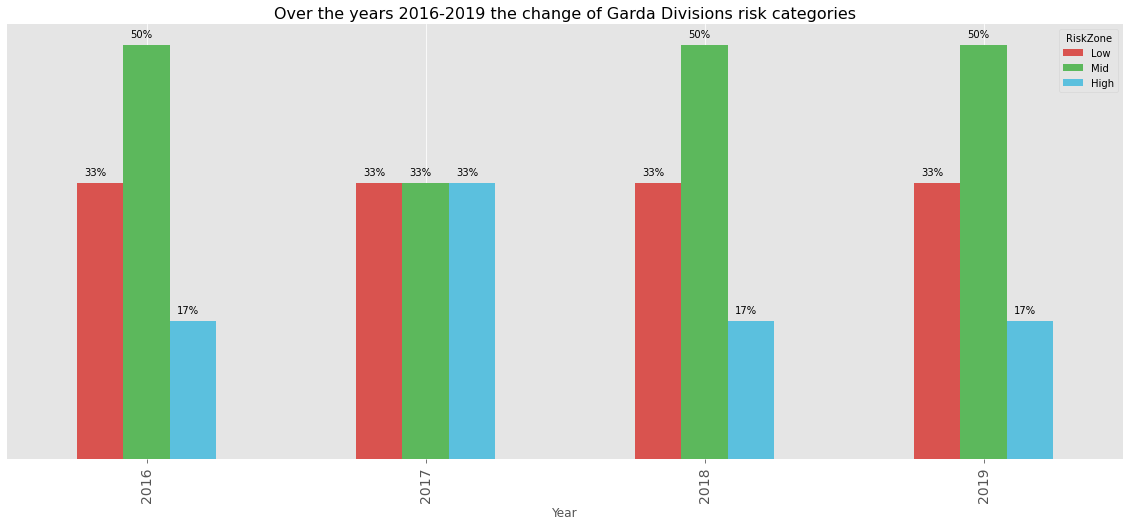

In [157]:
ax = crime_bar.div(crime_bar.sum(1), axis=0).plot(kind='bar', color=['#d9534f','#5cb85c', '#5bc0de' ], figsize=(20, 8))

ax.set_title("Over the years 2016-2019 the change of Garda Divisions risk categories",fontsize=16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
#ax.set_xlabel(crime_bar['RiskZone'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

#### Visualization using word clouds

In [313]:
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

     |████████████████████████████████| 366 kB 16.0 MB/s eta 0:00:01
Wordcloud is installed and imported!


In [314]:
stopwords = set(STOPWORDS)

In [315]:
lst_v_dsc = crime_data_full['OFFENCE'].tolist()

word_string = " ".join(str(s) for s in lst_v_dsc)

wordcloud = WordCloud(background_color='white', max_words=2000,stopwords=stopwords).generate(word_string)

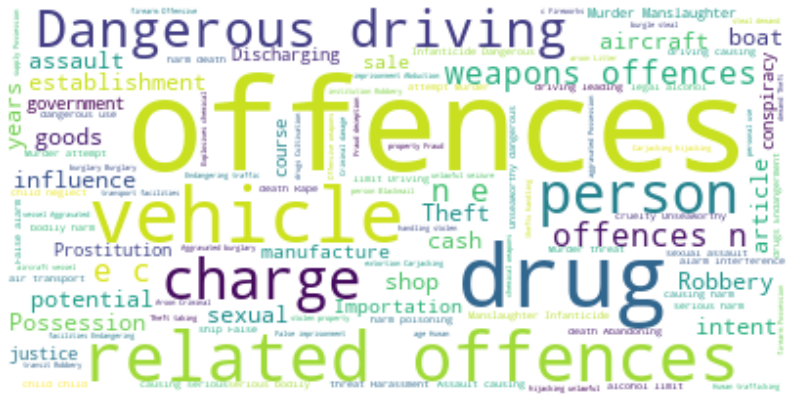

In [316]:
stopwords.add('Mid risk') # add the words said to stopwords
stopwords.add('High risk')
stopwords.add('Low risk')
# re-generate the word cloud
wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Append the data that was prepared with all necessary information with Location Details

In [195]:
dublin_loc= dublin_data.groupby(['PostalDistrict'],as_index= False, axis=0).sum()
dublin_loc.head()

,PostalDistrict,2021PopulationEstimate,Total Incidents,AverageRentalValue
0,Dublin 1,56245,921514,19557.178056
1,Dublin 10,9348,69263,1351.007000
2,Dublin 11,131682,554104,11446.800000
3,Dublin 12,28773,195224,5841.971733
4,Dublin 13,41110,309070,7874.059677


In [196]:
dublin_loc=dublin_new[['PostalDistrict','2021PopulationEstimate']]
dublin_loc.head()

,PostalDistrict,2021PopulationEstimate
0,Dublin 1,56245
1,Dublin 10,9348
2,Dublin 11,131682
3,Dublin 12,28773
4,Dublin 13,41110


In [197]:
dublin_loc.shape

(22, 2)

In [198]:
location_data = pd.DataFrame(columns=["PostalDistrict", "Latitude", "Longitude"])
i=0

for address in dublin_loc['PostalDistrict']:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    Latitude=location.latitude
    Longitude=location.longitude
    PostalDistrict=dublin_loc['PostalDistrict'].iloc[i]
    i=i+1
    location_data = location_data.append({"PostalDistrict":PostalDistrict,"Latitude":Latitude, "Longitude":Longitude}, ignore_index=True)

location_data.head()


,PostalDistrict,Latitude,Longitude
0,Dublin 1,53.352488,-6.256646
1,Dublin 10,53.343217,-6.360964
2,Dublin 11,53.386614,-6.292627
3,Dublin 12,53.320529,-6.328824
4,Dublin 13,53.385651,-6.075383


In [200]:
dublin_full=pd.merge(dublin_data, location_data, on='PostalDistrict', how='inner')
dublin_full.head()

,Neighborhood,PostalDistrict,GARDA DIVISION,2021PopulationEstimate,Total Incidents,RiskZone,AverageRentalValue,address,Latitude,Longitude
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8441,83774,High,1777.925278,"Abbey St,Dublin 1",53.352488,-6.256646
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,7137,83774,High,1777.925278,"Amiens St,Dublin 1",53.352488,-6.256646
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1108,83774,High,1777.925278,"Capel St,Dublin 1",53.352488,-6.256646
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1794,83774,High,1777.925278,"Dorset St,Dublin 1",53.352488,-6.256646
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6636,83774,High,1777.925278,"Henry St,Dublin 1",53.352488,-6.256646


In [202]:
dublin_new=dublin_full[['PostalDistrict','GARDA DIVISION','RiskZone','AverageRentalValue','Latitude','Longitude']]
dublin_new = pd.DataFrame.drop_duplicates(dublin_new)
dublin_new.head()

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude
0,Dublin 1,D.M.R. NORTH CENTRAL,High,1777.925278,53.352488,-6.256646
11,Dublin 10,D.M.R. WESTERN,Mid,1351.007000,53.343217,-6.360964
12,Dublin 11,D.M.R. WESTERN,Mid,1430.850000,53.386614,-6.292627
20,Dublin 12,D.M.R. SOUTHERN,Low,1460.492933,53.320529,-6.328824
24,Dublin 13,D.M.R. NORTHERN,Mid,1574.811935,53.385651,-6.075383


In [207]:
dublin_new.reset_index()
dublin_new.shape

(22, 6)

In [208]:
# create map of Dublin Postal Districts using latitude and longitude values
map_dublin = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dublin_new['Latitude'], dublin_new['Longitude'], dublin_new['PostalDistrict']):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_dublin)  
    
map_dublin

## Modeling
Classification -- Now, it is time to use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:
   * K Nearest Neighbor(KNN)
This is only to train the dataset based to get the risk Zone. For our learning purposes and doesnt answer the original question. It just gives the idea of the data and if we can rely on it. 

The original exercise is to find the clusters for which we will use the Clustering Algorithm:
   * K-Means Clustering.

In [296]:
dublin_full['RiskZone'].replace(to_replace=['Low','Mid','High'], value=[1,2,3],inplace=True)
dublin_full.head()


,Neighborhood,PostalDistrict,GARDA DIVISION,2021PopulationEstimate,Total Incidents,RiskZone,AverageRentalValue,address,Latitude,Longitude
0,Abbey St,Dublin 1,D.M.R. NORTH CENTRAL,8441,83774,3,1777.925278,"Abbey St,Dublin 1",53.352488,-6.256646
1,Amiens St,Dublin 1,D.M.R. NORTH CENTRAL,7137,83774,3,1777.925278,"Amiens St,Dublin 1",53.352488,-6.256646
2,Capel St,Dublin 1,D.M.R. NORTH CENTRAL,1108,83774,3,1777.925278,"Capel St,Dublin 1",53.352488,-6.256646
3,Dorset St,Dublin 1,D.M.R. NORTH CENTRAL,1794,83774,3,1777.925278,"Dorset St,Dublin 1",53.352488,-6.256646
4,Henry St,Dublin 1,D.M.R. NORTH CENTRAL,6636,83774,3,1777.925278,"Henry St,Dublin 1",53.352488,-6.256646


In [307]:
Feature = dublin_full[['2021PopulationEstimate','Total Incidents','AverageRentalValue', 'Latitude','Longitude']]
X = Feature
X[0:5]

,2021PopulationEstimate,Total Incidents,AverageRentalValue,Latitude,Longitude
0,8441,83774,1777.925278,53.352488,-6.256646
1,7137,83774,1777.925278,53.352488,-6.256646
2,1108,83774,1777.925278,53.352488,-6.256646
3,1794,83774,1777.925278,53.352488,-6.256646
4,6636,83774,1777.925278,53.352488,-6.256646


In [308]:
y = dublin_full['RiskZone'].values
y[0:5]

array([3, 3, 3, 3, 3])

In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (101, 5) (101,)
Test set: (26, 5) (26,)


In [310]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


In [311]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhatKNN = neigh.predict(X_test)
print("Train set Accuracy--> ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy -->", metrics.accuracy_score(y_test, yhatKNN))
print("F1  Accuracy -->", metrics.f1_score(y_test, yhatKNN, average='weighted'))

Train set Accuracy-->  1.0
Test set Accuracy --> 1.0
F1  Accuracy --> 1.0


**BY performing the clasification technique KNN we got the K=1 which means this data clrearly is not for a classification problem and hence we can confidently say that the use of K-Means clustering algorithm is a correct selection and this will answer our problem by clustering neighborhoods. 
Thus by finding the clusters which can be infered further based on individual to get a idea of each location we answer the problem statement.**

### Use of Foursquare data to get the venues in each Postal District of Dublin City

In [218]:
CLIENT_ID = 'PZAO3ZHOHBZKDZWF12R3GJ3ALRULIHMTSTMPT44RTHPBYMEW' # your Foursquare ID
CLIENT_SECRET = 'Z3NFVXGUBA3CEOU3OJWS31UHLRSMYHZGLMAJWS4GNEKH3T0F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PZAO3ZHOHBZKDZWF12R3GJ3ALRULIHMTSTMPT44RTHPBYMEW
CLIENT_SECRET:Z3NFVXGUBA3CEOU3OJWS31UHLRSMYHZGLMAJWS4GNEKH3T0F


In [293]:
radius=500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalDistrict', 
                  'PostalDistrict Latitude', 
                  'PostalDistrict Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [222]:
dublin_venues = getNearbyVenues(names=dublin_new['PostalDistrict'],
                                   latitudes=dublin_new['Latitude'],
                                   longitudes=dublin_new['Longitude']
                                  )
#print(brussels_venues.shape)
dublin_venues.shape

Dublin 1
Dublin 10
Dublin 11
Dublin 12
Dublin 13
Dublin 14
Dublin 15
Dublin 16
Dublin 17
Dublin 18
Dublin 2
Dublin 20
Dublin 22
Dublin 24
Dublin 3
Dublin 4
Dublin 5
Dublin 6
Dublin 6W
Dublin 7
Dublin 8
Dublin 9


(339, 7)

In [223]:
dublin_venues.head()

,PostalDistrict,PostalDistrict Latitude,PostalDistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dublin 1,53.352488,-6.256646,147 Deli,53.353410,-6.259807,Deli / Bodega
1,Dublin 1,53.352488,-6.256646,Holiday Inn Express Dublin City Centre Hotel,53.352306,-6.260955,Hotel
2,Dublin 1,53.352488,-6.256646,The Celt,53.350442,-6.255071,Pub
3,Dublin 1,53.352488,-6.256646,The Hop House (Kim Chi),53.352981,-6.260772,Korean Restaurant
4,Dublin 1,53.352488,-6.256646,Murray's Bar,53.352419,-6.261256,Pub


Getting all the venues in pivoted table

In [226]:
# one hot encoding
dublin_onehot = pd.get_dummies(dublin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dublin_onehot['PostalDistrict'] = dublin_venues['PostalDistrict'] 

# move neighborhood column to the first column
fixed_columns = [dublin_onehot.columns[-1]] + list(dublin_onehot.columns[:-1])
dublin_onehot = dublin_onehot[fixed_columns]

dublin_onehot.head()

,PostalDistrict,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bar,Bed & Breakfast,...,Theater,Theme Park,Tour Provider,Toy / Game Store,Train Station,Tram Station,Turkish Restaurant,Video Game Store,Wine Bar,Wine Shop
0,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dublin 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
dublin_grouped = dublin_onehot.groupby('PostalDistrict').mean().reset_index()
dublin_grouped

dublin_grouped.shape

(21, 123)

In [282]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalDistrict']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dublin_venues_sorted = pd.DataFrame(columns=columns)
dublin_venues_sorted['PostalDistrict'] = dublin_grouped['PostalDistrict']

for ind in np.arange(dublin_grouped.shape[0]):
    dublin_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dublin_grouped.iloc[ind, :], num_top_venues)

dublin_venues_sorted.head()

,PostalDistrict,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Dublin 1,Hotel,Pub,Coffee Shop,Bed & Breakfast,Theater,Supermarket,Café,Sandwich Place,Hostel,Gastropub,Fast Food Restaurant,Korean Restaurant,Market,Italian Restaurant,French Restaurant
1,Dublin 10,Bar,Grocery Store,Thai Restaurant,Chinese Restaurant,Burger Joint,Gym,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Wine Shop,Frozen Yogurt Shop,Fast Food Restaurant,Farmers Market,English Restaurant
2,Dublin 11,Department Store,Grocery Store,Electronics Store,Coffee Shop,Fast Food Restaurant,Liquor Store,Pet Store,Gym,Gym / Fitness Center,Discount Store,Donut Shop,History Museum,English Restaurant,Farmers Market,Historic Site
3,Dublin 12,Convenience Store,Pub,Department Store,Fast Food Restaurant,Chinese Restaurant,Bakery,Grocery Store,Food & Drink Shop,Fish Market,Fish & Chips Shop,English Restaurant,Farmers Market,French Restaurant,Electronics Store,Donut Shop
4,Dublin 13,Café,Ice Cream Shop,Seafood Restaurant,Pub,Fish & Chips Shop,Castle,Deli / Bodega,Hungarian Restaurant,Train Station,Convenience Store,Farmers Market,Coffee Shop,Food & Drink Shop,Food Court,Wine Shop


In [254]:
dublin_venues_sorted.shape

(21, 17)

### K-Means Clustering 
* Now that we have all the information we need to find the clusters based on the data provided.
* The clusters are formed based on the various datapoints available in each Postal District of Dublin City.

In [283]:
# set number of clusters
kclusters =7
dublin_grouped_clustering = dublin_grouped.drop('PostalDistrict', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dublin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
dublin_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dublin_merged = dublin_new

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dublin_merged = dublin_merged.join(dublin_venues_sorted.set_index('PostalDistrict'), on='PostalDistrict')

dublin_merged.head() # check the last columns!

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Dublin 1,D.M.R. NORTH CENTRAL,High,1777.925278,53.352488,-6.256646,1.0,Hotel,Pub,Coffee Shop,...,Supermarket,Café,Sandwich Place,Hostel,Gastropub,Fast Food Restaurant,Korean Restaurant,Market,Italian Restaurant,French Restaurant
11,Dublin 10,D.M.R. WESTERN,Mid,1351.007000,53.343217,-6.360964,0.0,Bar,Grocery Store,Thai Restaurant,...,Gym,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Wine Shop,Frozen Yogurt Shop,Fast Food Restaurant,Farmers Market,English Restaurant
12,Dublin 11,D.M.R. WESTERN,Mid,1430.850000,53.386614,-6.292627,1.0,Department Store,Grocery Store,Electronics Store,...,Liquor Store,Pet Store,Gym,Gym / Fitness Center,Discount Store,Donut Shop,History Museum,English Restaurant,Farmers Market,Historic Site
20,Dublin 12,D.M.R. SOUTHERN,Low,1460.492933,53.320529,-6.328824,1.0,Convenience Store,Pub,Department Store,...,Bakery,Grocery Store,Food & Drink Shop,Fish Market,Fish & Chips Shop,English Restaurant,Farmers Market,French Restaurant,Electronics Store,Donut Shop
24,Dublin 13,D.M.R. NORTHERN,Mid,1574.811935,53.385651,-6.075383,1.0,Café,Ice Cream Shop,Seafood Restaurant,...,Castle,Deli / Bodega,Hungarian Restaurant,Train Station,Convenience Store,Farmers Market,Coffee Shop,Food & Drink Shop,Food Court,Wine Shop


In [280]:
dublin_merged.shape

(22, 22)

In [284]:
#create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=10)

a=[0,1,2,3,4,5,6]
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dublin_merged['Latitude'], dublin_merged['Longitude'], dublin_merged['PostalDistrict'], a):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=2).add_to(map_clusters)
       
map_clusters

In [285]:
Cluster1 = dublin_merged[dublin_merged['Cluster Labels'] == 0]
Cluster1

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
11,Dublin 10,D.M.R. WESTERN,Mid,1351.007000,53.343217,-6.360964,0.0,Bar,Grocery Store,Thai Restaurant,...,Gym,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Wine Shop,Frozen Yogurt Shop,Fast Food Restaurant,Farmers Market,English Restaurant
29,Dublin 14,D.M.R. EASTERN,Low,1959.605625,53.289133,-6.283512,0.0,Pharmacy,Grocery Store,Fish Market,...,Discount Store,Donut Shop,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,French Restaurant
106,Dublin 6W,D.M.R. SOUTHERN,Low,1666.158824,53.309282,-6.299435,0.0,Pharmacy,Park,Sandwich Place,...,Lake,Bar,Fast Food Restaurant,Fish Market,Fish & Chips Shop,English Restaurant,Farmers Market,Food Court,Electronics Store,Donut Shop


In [286]:
Cluster2 = dublin_merged[dublin_merged['Cluster Labels'] == 1]
Cluster2

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Dublin 1,D.M.R. NORTH CENTRAL,High,1777.925278,53.352488,-6.256646,1.0,Hotel,Pub,Coffee Shop,...,Supermarket,Café,Sandwich Place,Hostel,Gastropub,Fast Food Restaurant,Korean Restaurant,Market,Italian Restaurant,French Restaurant
12,Dublin 11,D.M.R. WESTERN,Mid,1430.850000,53.386614,-6.292627,1.0,Department Store,Grocery Store,Electronics Store,...,Liquor Store,Pet Store,Gym,Gym / Fitness Center,Discount Store,Donut Shop,History Museum,English Restaurant,Farmers Market,Historic Site
20,Dublin 12,D.M.R. SOUTHERN,Low,1460.492933,53.320529,-6.328824,1.0,Convenience Store,Pub,Department Store,...,Bakery,Grocery Store,Food & Drink Shop,Fish Market,Fish & Chips Shop,English Restaurant,Farmers Market,French Restaurant,Electronics Store,Donut Shop
24,Dublin 13,D.M.R. NORTHERN,Mid,1574.811935,53.385651,-6.075383,1.0,Café,Ice Cream Shop,Seafood Restaurant,...,Castle,Deli / Bodega,Hungarian Restaurant,Train Station,Convenience Store,Farmers Market,Coffee Shop,Food & Drink Shop,Food Court,Wine Shop
35,Dublin 15,D.M.R. WESTERN,Mid,1453.229873,53.394935,-6.389209,1.0,Sporting Goods Shop,Clothing Store,Italian Restaurant,...,Fast Food Restaurant,Supermarket,American Restaurant,Asian Restaurant,Bus Stop,Bagel Shop,Multiplex,Mobile Phone Shop,Men's Store,Kids Store
59,Dublin 2,D.M.R. SOUTH CENTRAL,Mid,2115.575273,53.338971,-6.252679,1.0,Coffee Shop,Café,French Restaurant,...,Hotel,Italian Restaurant,Hotel Bar,Steakhouse,Museum,Park,Mexican Restaurant,Seafood Restaurant,Government Building,Bookstore
75,Dublin 20,D.M.R. WESTERN,Mid,1435.632353,53.352370,-6.372325,1.0,Convenience Store,Pub,Gym,...,Wine Shop,Fast Food Restaurant,Food & Drink Shop,Fish Market,Fish & Chips Shop,English Restaurant,Farmers Market,French Restaurant,Electronics Store,Donut Shop
85,Dublin 3,D.M.R. NORTHERN,Mid,1528.685248,53.361223,-6.185467,1.0,Fish & Chips Shop,Indian Restaurant,Pub,...,Thai Restaurant,Wine Shop,French Restaurant,Food Court,Food & Drink Shop,Fish Market,Farmers Market,Fast Food Restaurant,English Restaurant,Electronics Store
92,Dublin 4,D.M.R. SOUTH CENTRAL,Mid,2109.474435,53.327507,-6.227486,1.0,Pub,Hotel,Café,...,Thai Restaurant,Convention Center,Sandwich Place,Park,Cricket Ground,Bus Stop,Food & Drink Shop,French Restaurant,Italian Restaurant,Wine Bar
99,Dublin 5,D.M.R. NORTHERN,Mid,1568.593125,53.383454,-6.181923,1.0,Paper / Office Supplies Store,Supermarket,Pharmacy,...,Gym,Chinese Restaurant,Café,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store,Farmers Market,English Restaurant,Donut Shop


In [287]:
Cluster3 = dublin_merged[dublin_merged['Cluster Labels'] == 2]
Cluster3

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
113,Dublin 8,D.M.R. SOUTH CENTRAL,Mid,1502.774531,53.350263,-6.320213,2.0,Boat or Ferry,Historic Site,Harbor / Marina,...,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,English Restaurant,Farmers Market,Frozen Yogurt Shop,Electronics Store,Donut Shop


In [288]:
Cluster4 = dublin_merged[dublin_merged['Cluster Labels'] == 3]
Cluster4

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
77,Dublin 22,D.M.R. WESTERN,Mid,1361.426667,53.317015,-6.43853,3.0,Miscellaneous Shop,Golf Course,Wine Shop,...,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant,Frozen Yogurt Shop


In [289]:
Cluster5 = dublin_merged[dublin_merged['Cluster Labels']==4]
Cluster5

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
50,Dublin 18,D.M.R. EASTERN,Low,1903.839286,53.240935,-6.183345,4.0,Soccer Field,Wine Shop,Frozen Yogurt Shop,...,Donut Shop,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant


In [291]:
Cluster6 = dublin_merged[dublin_merged['Cluster Labels']== 5]
Cluster6

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
41,Dublin 16,D.M.R. EASTERN,Low,1782.931071,53.255722,-6.296345,5.0,Garden Center,Café,Furniture / Home Store,...,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant,Frozen Yogurt Shop


In [292]:
Cluster7 = dublin_merged[dublin_merged['Cluster Labels']== 6]
Cluster7

,PostalDistrict,GARDA DIVISION,RiskZone,AverageRentalValue,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
44,Dublin 17,D.M.R. NORTHERN,Mid,1621.311667,53.400361,-6.209491,6.0,Park,Convenience Store,Construction & Landscaping,...,Donut Shop,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Food Court,French Restaurant
121,Dublin 9,D.M.R. NORTHERN,Mid,1544.928529,53.386050,-6.245577,6.0,Park,Bus Stop,Convenience Store,...,Fast Food Restaurant,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Farmers Market,Frozen Yogurt Shop,English Restaurant,Electronics Store,Donut Shop


In [ ]:
ClusterNA = dublin_merged[dublin_merged['Cluster Labels'].isna()]
ClusterNA

### Each cluster gives all the details required for a person to look in. This way we can help solve the problem and can help them Identify a place to move in.
If I have to move in I would chose the Postal Districts of Cluster1 as I can see almost all the main Venues like Pharmacies, Grocery Stores, Departmentals, Parks  & many more available. Also In this Cluster the rents are in medium range and the most important factor the Risk Zone is Low.

The inference made here is clearly based on the dataset available and can change based on the data.